## Objective: Put qubit in superposition and measure it.

##### important note:

|0⟩ =
[
1
0
]

|1⟩ =
[
0
1
]

#### imports

In [43]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import plot_bloch_vector_spherical
from math import sqrt, pi

#### create qubit

In [44]:
# Create qubit.
qubit = QuantumCircuit(1, 1)
qubit.h(0)    # Put first qubit in superposition
qubit.measure(0, 0)

# Show the steps of the circuit.
qubit.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

#### simulate the qubit

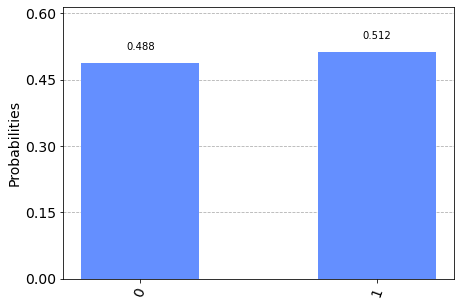

In [45]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qubit, simulator, shots=1000)    # Execute simulating qubit 1000 times.
result = job.result()

# Show results of the simulation.
counts = result.get_counts(qubit)
plot_histogram(counts)

#### visualize the measurements

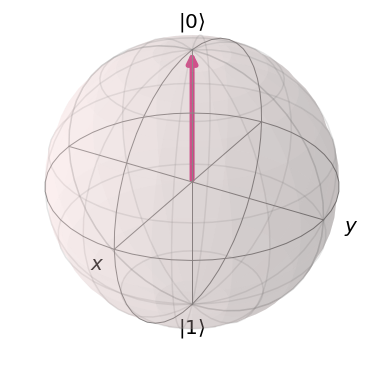

In [46]:
sv_sim = Aer.get_backend('statevector_simulator')

# NOTE: The reason why a new simulator is used is bc this simulator
#       returns the statevector (final measurement) of the qubit
#       through get_statevector() while 'qasm_simulator' returns
#       get_counts(), getting measurements for a specific amounts of shots.

# Run simulation.
qobj = assemble(qubit)
state = sv_sim.run(qobj).result().get_statevector()

# Determine the statevector.
if state[0] == 1:
    bloch_inpt = pi*2
else:
    bloch_inpt = pi

# Show the result of the simulation.
plot_bloch_vector_spherical([bloch_inpt, 1, 1])
